In [1]:
import pandas as pd

df = pd.read_csv('../data/preprocessed/preprocessed_data.csv')
X = df.drop(['price'],axis='columns')
y = df.price


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [3]:

from sklearn.linear_model import LinearRegression

# train the model using an Linear Regression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
# score method will tell you the score
lr_clf.score(X_test,y_test)


0.8629132245229436

<h2 style='color:white'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [5]:
# K fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# shuffle split and each fold has random rows or records
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

<h2 style='color:white'>Find best model using GridSearchCV</h2>
<p> Using the gridsearch it will tell you which best model and it will do the hyper parameter tunning as well </p>

In [6]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'fit_intercept': [True, False]
            }
        },
        'elasticnet': {
            'model': ElasticNet(),
            'params': {
                'alpha': [0.1, 1, 10],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
    }

    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # this is a dictonarie and which is inside that previous function
    for algo_name, config in algos.items():
        #  this cv para is Cross Validation
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        # it will tell you the best params in particular run
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # pd.DataFrame will print it as tabular format
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847951,{'fit_intercept': False}
1,lasso,0.726738,"{'alpha': 2, 'selection': 'cyclic'}"
2,ridge,0.848050,"{'alpha': 0.1, 'fit_intercept': False}"
3,elasticnet,0.756214,"{'alpha': 0.1, 'l1_ratio': 0.9}"
4,decision_tree,0.715573,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


# Define models and expanded hyperparameters for GridSearchCV
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'selection': ['random', 'cyclic'],
            'max_iter': [1000, 5000]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
            'max_iter': [1000, 5000]
        }
    },
    'elasticnet': {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.9],
            'max_iter': [1000, 5000]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    }
}


In [ ]:
# Train and evaluate each model using GridSearchCV
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = []
best_model = None
best_score = -np.inf

for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=-1, return_train_score=False)
    gs.fit(X_train, y_train)
    
    y_pred = gs.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(algo_name, 'has completed')
    scores.append({
        'model': algo_name,
        'test_mse': mse,
        'test_rmse': rmse,
        'test_mae': mae,
        'test_r2': r2,
        'best_params': gs.best_params_
    })
    
    # Keep track of the best model based on R² score
    if r2 > best_score:
        best_score = r2
        best_model = gs.best_estimator_


linear_regression has completed
lasso has completed
ridge has completed
elasticnet has completed
decision_tree has completed
random_forest has completed
gradient_boosting has completed


In [ ]:
# Convert the results to a DataFrame and display them
results_df = pd.DataFrame(scores, columns=['model', 'test_mse', 'test_rmse', 'test_mae', 'test_r2', 'best_params'])
results_df.sort_values(by='test_r2', ascending=False, inplace=True)
print(results_df)

               model     test_mse  test_rmse   test_mae   test_r2  \
0  linear_regression   710.805979  26.660945  16.156268  0.862962   
2              ridge   729.181669  27.003364  16.056748  0.859419   
6  gradient_boosting   779.242913  27.914923  14.749068  0.849767   
5      random_forest  1035.237451  32.175106  17.686366  0.800413   
1              lasso  1127.789776  33.582581  20.051244  0.782570   
4      decision_tree  1153.842221  33.968253  18.540583  0.777547   
3         elasticnet  1289.652033  35.911726  21.523280  0.751364   

                                         best_params  
0                           {'fit_intercept': False}  
2  {'alpha': 1, 'fit_intercept': False, 'max_iter...  
6  {'learning_rate': 0.2, 'max_depth': 5, 'min_sa...  
5  {'max_depth': 20, 'min_samples_split': 10, 'n_...  
1  {'alpha': 0.1, 'max_iter': 1000, 'selection': ...  
4  {'criterion': 'friedman_mse', 'max_depth': 20,...  
3  {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000}  


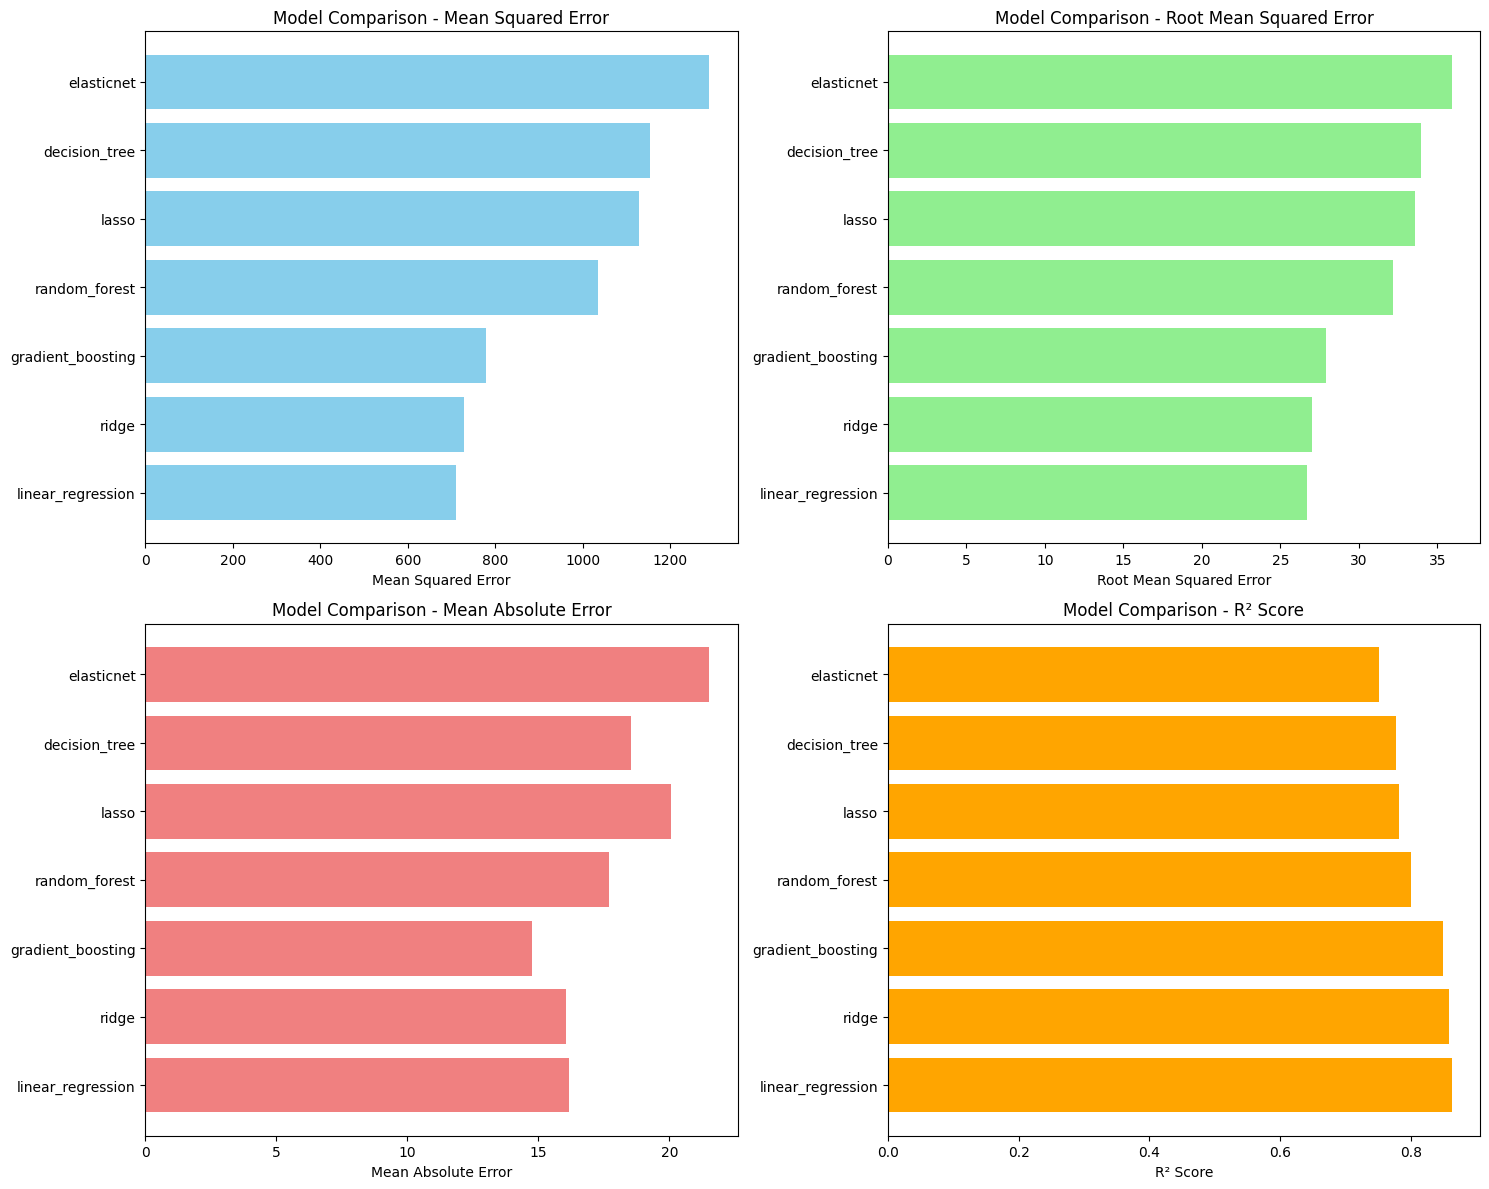

In [ ]:
# Plot the results (MSE, RMSE, MAE, and R² for each model)
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot Mean Squared Error
ax[0, 0].barh(results_df['model'], results_df['test_mse'], color='skyblue')
ax[0, 0].set_xlabel('Mean Squared Error')
ax[0, 0].set_title('Model Comparison - Mean Squared Error')

# Plot Root Mean Squared Error
ax[0, 1].barh(results_df['model'], results_df['test_rmse'], color='lightgreen')
ax[0, 1].set_xlabel('Root Mean Squared Error')
ax[0, 1].set_title('Model Comparison - Root Mean Squared Error')

# Plot Mean Absolute Error
ax[1, 0].barh(results_df['model'], results_df['test_mae'], color='lightcoral')
ax[1, 0].set_xlabel('Mean Absolute Error')
ax[1, 0].set_title('Model Comparison - Mean Absolute Error')

# Plot R² Score
ax[1, 1].barh(results_df['model'], results_df['test_r2'], color='orange')
ax[1, 1].set_xlabel('R² Score')
ax[1, 1].set_title('Model Comparison - R² Score')

plt.tight_layout()
plt.show()


In [ ]:
print(f"The best model is {best_model} with an R² score of {best_score:.4f}")

The best model is LinearRegression(fit_intercept=False) with an R² score of 0.8630


In [ ]:
# Save the best model
joblib.dump(best_model, 'banglore_home_prices_model_2.pickle')

In [7]:

"""
 predict the price of a house based on its location, square footage (sqft),
 number of bathrooms (bath), and number of bedrooms (bhk)
"""

"""
Find the Index of the Location:

loc_index = np.where(X.columns=='location2')[0][0] finds the index corresponding to
'location2' in X.columns, say it's 4.
Initialize the Feature Array:

x = np.zeros(len(X.columns)) creates an array of zeros, e.g., [0, 0, 0, 0, 0, 0, ...].
Set the Sqft, Bath, and BHK Values:

x[0] = 1200, x[1] = 2, x[2] = 3 sets the first three values in x, so x becomes [1200, 2, 3, 0, 0, 0, ...].
Set the One-Hot Encoded Location:

if loc_index >= 0: x[4] = 1 sets the value of the corresponding location feature
(for 'location2') to 1, so x becomes [1200, 2, 3, 0, 1, 0, ...].
Make the Prediction:

The trained model lr_clf.predict([x]) is used to predict the price based on these features, and
the predicted price is returned.
"""


import numpy as np
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        # we are setting 4th index value as 1(True) means it is existing in the table if the user entered
        # new place it will become zero.
        x[loc_index] = 1

    print(x)
    # The model expects input as a 2D array (i.e., a list of features), which is why [x] is used.
    # [0] will be return prediction
    return lr_clf.predict([x])[0]